In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = 'GeneralAviationDashboard_Data_20221208_Public.xlsx'
sheet_name = 'Accidents'

# Read the data from the "Accidents" sheet
try:
    accidents_df = pd.read_excel(file_path, sheet_name=sheet_name)
    read_success = True
except Exception as e:
    read_success = False
    error_message = str(e)
    
None if read_success else print(error_message)

# Filter the dataset for accidents in Alaska with a fatal injury level
# filtered_df = accidents_df[(accidents_df['StateOrRegion'] == 'Alaska') & (accidents_df['InjuryLevel'] == 'Fatal')]
# # filtered_df = accidents_df[(accidents_df['StateOrRegion'] == 'Alaska')]

# print(f"Total accidents in Alaska: {len(filtered_df)}")
# print(f"Total fatal accidents in Alaska: {len(filtered_df)}")
# print(f"Total nonfatal accidents in Alaska: {len(filtered_df)}")
# print(f"Total accidents in Alaska involving serious or fatal injuries: {len(filtered_df)}")

# print(filtered_df.head())  # Displaying the first few rows of the filtered data

C:\Users\zkhan\AppData\Local\Temp\ipykernel_21380\2287650634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_accidents['Month'] = state_accidents['EventDate'].dt.month


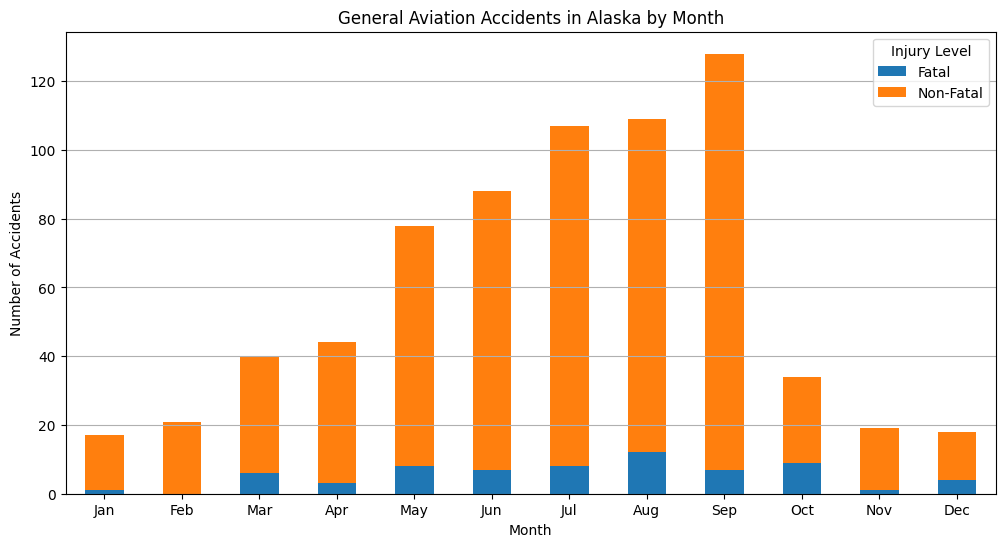

In [2]:
# Filter for accidents in stateName
stateName = 'Alaska'
state_accidents = accidents_df[accidents_df['StateOrRegion'] == stateName]

# Extract the month from the EventDate
state_accidents['Month'] = state_accidents['EventDate'].dt.month

# Group by month and injury level, then count the accidents
monthly_accidents = state_accidents.groupby(['Month', 'InjuryLevel']).size().unstack(fill_value=0)

# Plotting the timeline style bar chart
monthly_accidents.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title(f'General Aviation Accidents in {stateName} by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Injury Level')
plt.grid(axis='y')
plt.show()


C:\Users\zkhan\AppData\Local\Temp\ipykernel_21380\986458781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continental_us_accidents['Month'] = continental_us_accidents['EventDate'].dt.month


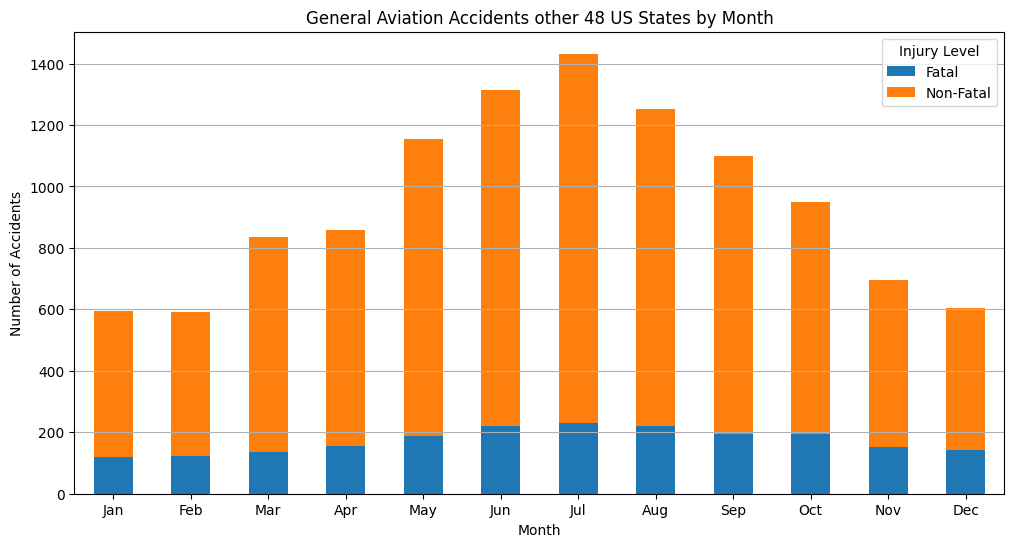

In [3]:
# Filter for accidents in Continental US
continental_us_accidents = accidents_df[
    (accidents_df['Country'] == 'United States') & 
    (accidents_df['StateOrRegion'] != 'Alaska') &
    (accidents_df['StateOrRegion'] != 'Hawaii')
]

# Extract the month from the EventDate
continental_us_accidents['Month'] = continental_us_accidents['EventDate'].dt.month

# Group by month and injury level, then count the accidents
monthly_accidents = continental_us_accidents.groupby(['Month', 'InjuryLevel']).size().unstack(fill_value=0)

# Plotting the timeline style bar chart
monthly_accidents.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('General Aviation Accidents other 48 US States by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Injury Level')
plt.grid(axis='y')
plt.show()



C:\Users\zkhan\AppData\Local\Temp\ipykernel_21380\4203634981.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_alaska_accidents['Year'] = september_alaska_accidents['EventDate'].dt.year


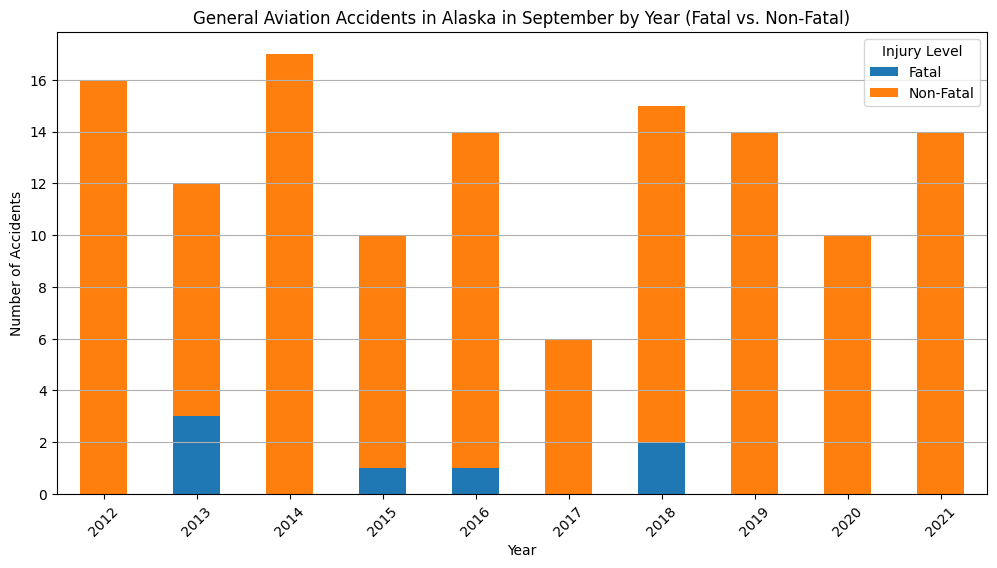

In [4]:
# Filter for accidents in Alaska in September
september_alaska_accidents = accidents_df[
    (accidents_df['StateOrRegion'] == 'Alaska') & 
    (accidents_df['EventDate'].dt.month == 9)
]

# Extract the year from the EventDate
september_alaska_accidents['Year'] = september_alaska_accidents['EventDate'].dt.year

# Group by year and injury level, then count the accidents
accident_counts = september_alaska_accidents.groupby(['Year', 'InjuryLevel']).size().unstack(fill_value=0)

# Plotting the bar chart
accident_counts.plot(kind='bar', figsize=(12, 6), stacked=True)

plt.title('General Aviation Accidents in Alaska in September by Year (Fatal vs. Non-Fatal)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Injury Level')
plt.grid(axis='y')
plt.show()
